# Homework Week 2: Fractal Clustering on Objective Function 1 (Affordability Index)

### Team: team-deep-thinkers

Submitted by: Miyar Karthik Kamath

Student ID: 017449133


### Dataset: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

The data contains information from the 1990 California census. The data was sourced from Kaggle.

**Columns**:

* longitude: A measure of how far west a house is; a higher value is farther west
* latitude: A measure of how far north a house is; a higher value is farther north
* housingMedianAge: Median age of a house within a block; a lower number is a newer building
* totalRooms: Total number of rooms within a block
* totalBedrooms: Total number of bedrooms within a block
* population: Total number of people residing within a block
* households: Total number of households, a group of people residing within a home unit, for a block
* medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
* medianHouseValue: Median house value for households within a block (measured in US Dollars)
* oceanProximity: Location of the house w.r.t ocean/sea

### Business Objective:

The primary business objective is to use machine learning to analyze a particular investment, help investors make data-driven decisions when purchasing investment properties, and analyze real estate prices by looking at affordability to maximize profitability and minimize risk.




### Importing Dependencies and Loading Dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/ML-Fall-2024/team-deep-thinkers/data/housing.csv'
housing_data = pd.read_csv(file_path)

In [ ]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Data Wrangling and Preparation

Clearing missing values, scaling data, and selecting relevant features for clustering.

Dropping NaN (Not a Number) values:

In [ ]:
housing_data.dropna(inplace=True)

Checking non-null values:

In [ ]:
housing_data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Checking for duplicate rows:

In [ ]:
housing_data[housing_data.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


### Exploratory Data Analysis and Visualization (EDAV)



Visualization of the distribution of important features such as median_house_value and median_income to see how the data is spread:

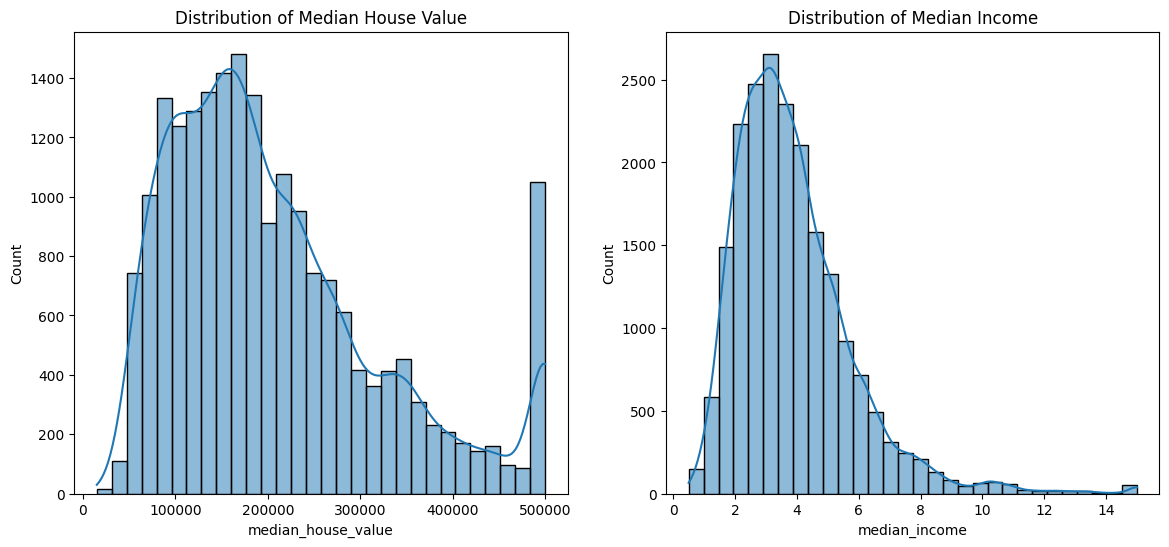

In [ ]:
# Distribution of key features
plt.figure(figsize=(14, 6))

# Median House Value Distribution
plt.subplot(1, 2, 1)
sns.histplot(housing_data['median_house_value'], bins=30, kde=True)
plt.title('Distribution of Median House Value')

# Median Income Distribution
plt.subplot(1, 2, 2)
sns.histplot(housing_data['median_income'], bins=30, kde=True)
plt.title('Distribution of Median Income')

plt.show()

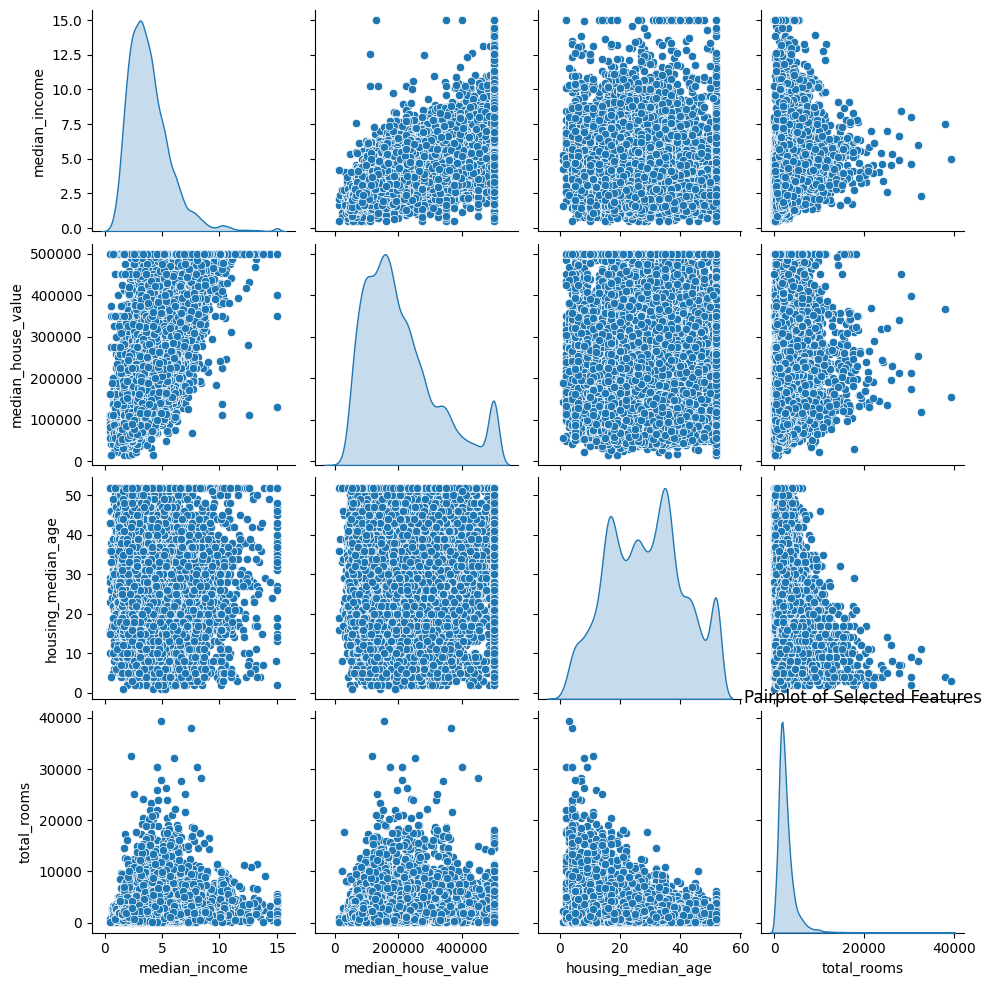

In [ ]:
# Pairplot of selected features
sns.pairplot(housing_data[['median_income', 'median_house_value', 'housing_median_age', 'total_rooms']], diag_kind='kde')
plt.title('Pairplot of Selected Features')
plt.show()

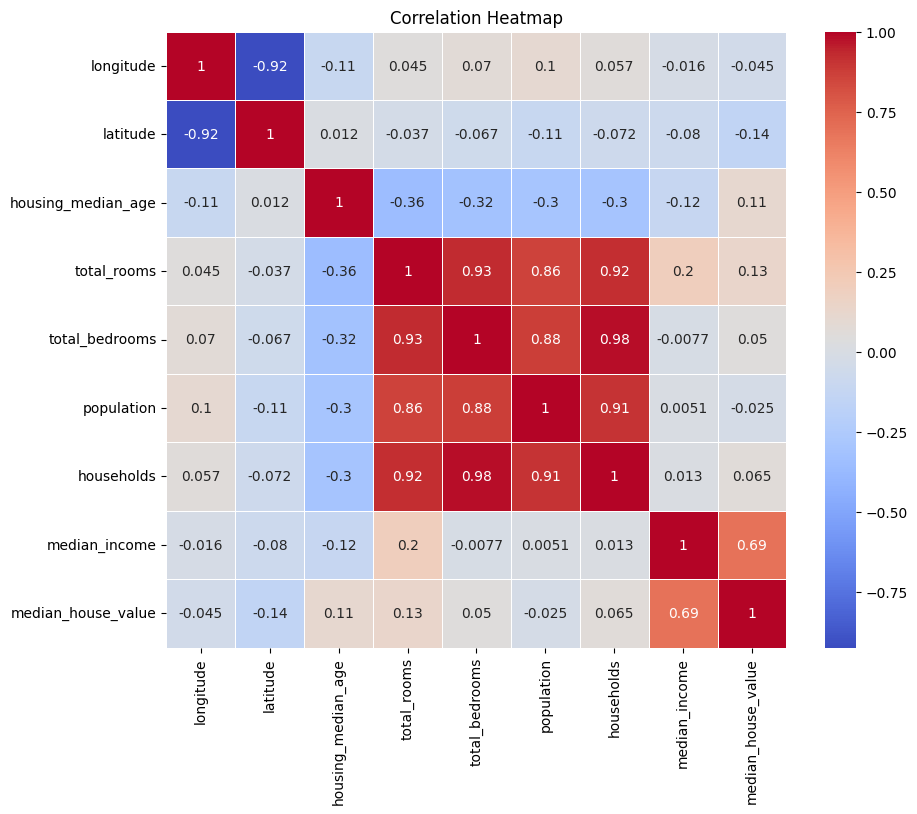

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = housing_data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

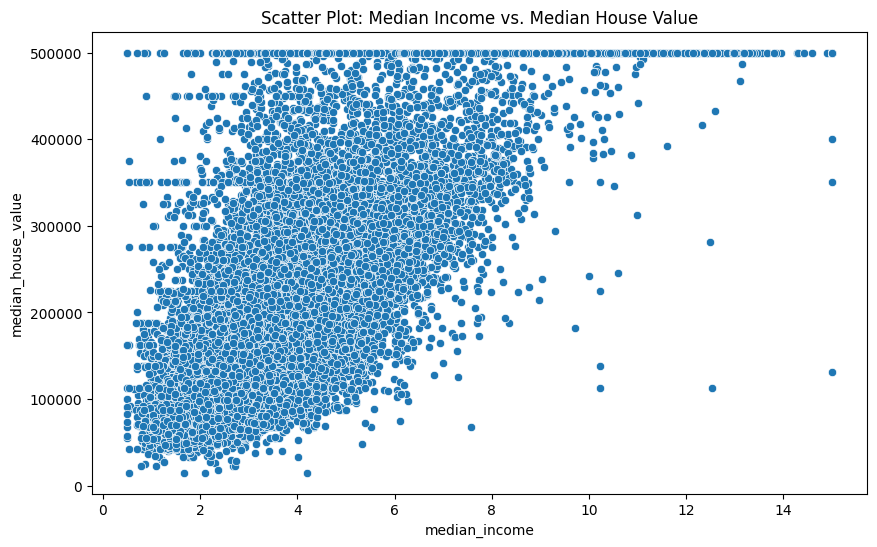

In [ ]:

# Scatter plot for two key features (Median Income vs. Median House Value)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=housing_data)
plt.title('Scatter Plot: Median Income vs. Median House Value')
plt.show()


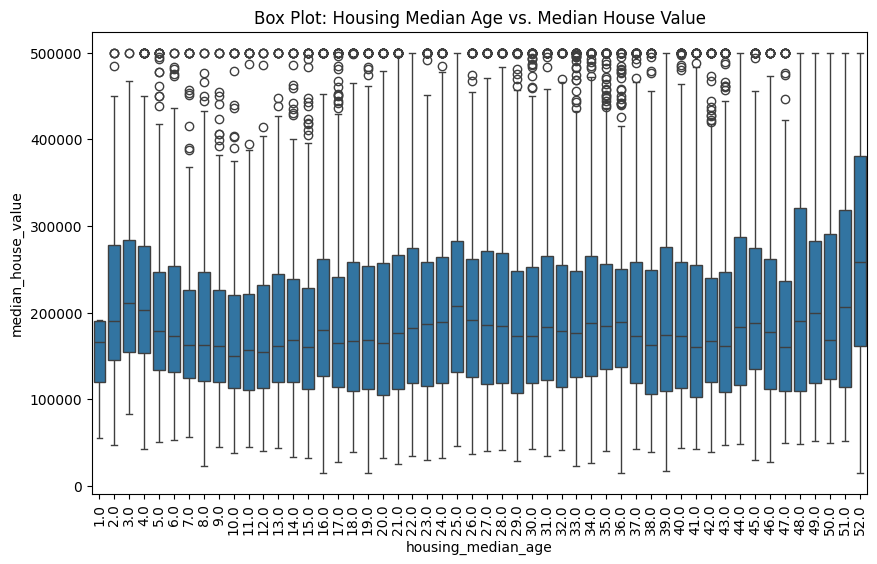

In [ ]:
# Box plot for housing_median_age across different house values
plt.figure(figsize=(10, 6))
sns.boxplot(x='housing_median_age', y='median_house_value', data=housing_data)
plt.title('Box Plot: Housing Median Age vs. Median House Value')
plt.xticks(rotation=90)
plt.show()

In [ ]:
features = housing_data[['median_income', 'median_house_value']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### Applying K-Means Clustering using Scikit

Initially assuming optimal k as 4 and running K-Means Clustering

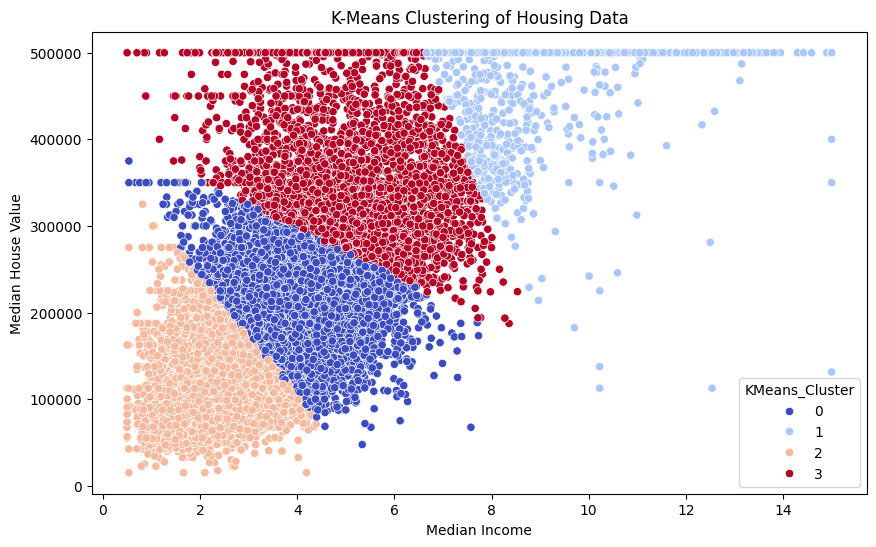

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
housing_data['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=housing_data['median_income'], y=housing_data['median_house_value'], hue=housing_data['KMeans_Cluster'], palette='coolwarm')
plt.title('K-Means Clustering of Housing Data')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

Using Elbow method, finding the ideal number of clusters in a dataset

In [ ]:
k_values = range(1, 11)
sse = []

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

In [ ]:
sse

[40865.99999999979,
 18780.567388615247,
 12725.81246768203,
 9645.059055336624,
 7794.488339914291,
 6494.573011266826,
 5635.854518476967,
 4773.461904134307,
 4204.042187271357,
 3821.941028704449]

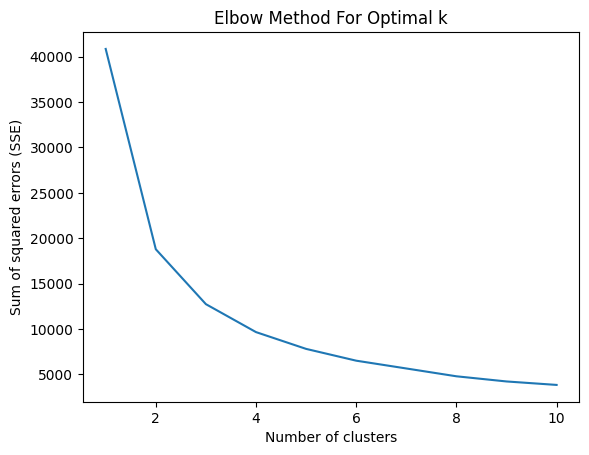

In [ ]:
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.plot(k_values, sse)

From the graph above, we can assume that 3 is ideal number of clusters.

Analyzing the Silhouette Score:

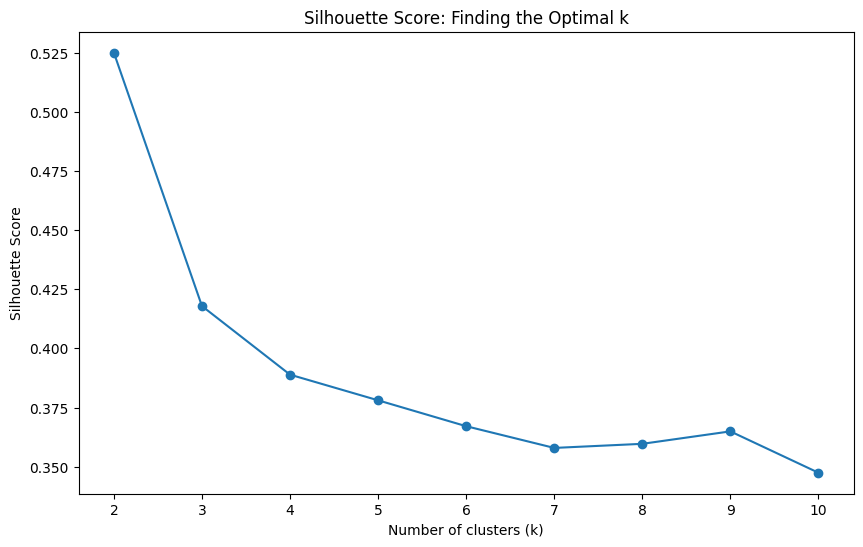

In [ ]:
silhouette_scores = []
k_values = range(2, 11)

# Test different values of k (number of clusters)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score: Finding the Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.show()

From the graph, we can see when K=3, Silhouette Score is the highest locally. Silhouette Score value ranges from -1 (worst score) to 1 (best score).

### Applying Fractal Clustering

#### Objective Function 1 : Affordability Index

Considering *Affordability Index* as an objective function, below is the formula we will be considering:

Affordability Index= Median House Price/Median Income

In real estate, house prices should be roughly 2.6 to 3 times the median household income for properties to be considered affordable.

After analyzing the SSE and Silhouette scores, cluster 3 seems optimal k. Now let's run K-means Clustering with k=3.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
housing_data['cluster'] = kmeans.fit_predict(housing_data[['median_house_value', 'median_income']])

 Recursive (Fractal) Clustering within Each Cluster:

In [ ]:
# Recursive function to apply K-means within each cluster
def fractal_clustering(data, cluster_col, max_depth, current_depth=0):
    if current_depth >= max_depth:
        return data

    # Cluster within each cluster
    for cluster_id in data[cluster_col].unique():
        # Subset data for each cluster
        cluster_data = data[data[cluster_col] == cluster_id]

        if len(cluster_data) > 5:
            # Apply K-means within this subset
            sub_kmeans = KMeans(n_clusters=2, random_state=42)
            new_labels = sub_kmeans.fit_predict(cluster_data[['median_house_value', 'median_income']])

            # Assign new sub-cluster labels
            data.loc[cluster_data.index, f'sub_cluster_{current_depth + 1}'] = new_labels

            # Recur for sub-clusters
            data = fractal_clustering(data, f'sub_cluster_{current_depth + 1}', max_depth, current_depth + 1)

    return data

# Apply fractal clustering with a max depth of 2
housing_data = fractal_clustering(housing_data, 'cluster', max_depth=2)

Evaluating Objective Function After Each Iteration

In [ ]:
# Calculate Affordability Index for each sub-cluster
housing_data['affordability_index'] = housing_data['median_house_value'] / housing_data['median_income']

# Check mean Affordability Index for each cluster
for depth in range(1, 3):
    cluster_col = f'sub_cluster_{depth}'
    mean_affordability = housing_data.groupby(cluster_col)['affordability_index'].mean() * 10000
    print(f'Mean Affordability Index for {cluster_col}:\n', mean_affordability)

Mean Affordability Index for sub_cluster_1:
 sub_cluster_1
0.0    5.995441e+08
1.0    5.337696e+08
Name: affordability_index, dtype: float64
Mean Affordability Index for sub_cluster_2:
 sub_cluster_2
0.0    4.891480e+08
1.0    7.472769e+08
Name: affordability_index, dtype: float64


We can notice that cluster 0 of sub_cluster_2 has the lowest Affordabity Index. The lower the Affordability Index, the more affordable a property.

Visualizing the Final Clusters:

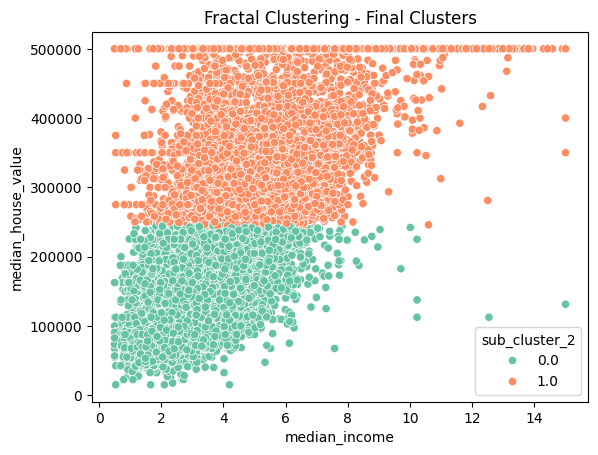

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize clusters at different levels
sns.scatterplot(x='median_income', y='median_house_value', hue='sub_cluster_2', data=housing_data, palette='Set2')
plt.title('Fractal Clustering - Final Clusters')
plt.show()

From the graph, we can deduce that sub_cluster_2 cluster 0 has the lowest affordability index, hence potentially the best deals.

A second dataset will be scraped from Zillow.com to possibly gather rental data and amalgamated with above dataset in future to calculate profitability.